In [184]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib notebook


In [185]:
customer=pd.read_csv("customer.csv")
customer.head()


,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [186]:
prod_cat_info=pd.read_csv("prod_cat_info.csv")
prod_cat_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [187]:
Transactions=pd.read_csv("Transactions.csv")
Transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [188]:
c1 = pd.merge(left = Transactions, right = customer , how = 'inner', left_on= 'cust_id' , right_on = 'customer_Id' )
c1.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0
2,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,270351,26-09-1981,M,5.0
3,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,270351,26-09-1981,M,5.0
4,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,270351,26-09-1981,M,5.0


In [189]:
customer_final = pd.merge(left = c1 , right = prod_cat_info, how = 'inner', left_on = ['prod_cat_code','prod_subcat_code'] ,
                          right_on= ['prod_cat_code','prod_sub_cat_code'])
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,271509,08-06-1981,M,3.0,Clothing,1,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,1,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,1,Women


In [190]:
customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,271509,08-06-1981,M,3.0,Clothing,1,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,1,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,1,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,271157,15-10-1973,F,6.0,Bags,4,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,272010,22-12-1972,F,5.0,Bags,4,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,267161,08-05-1981,M,9.0,Bags,4,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,273281,14-12-1988,F,9.0,Bags,4,Women


In [191]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23053 non-null  int64  
 1   cust_id            23053 non-null  int64  
 2   tran_date          23053 non-null  object 
 3   prod_subcat_code   23053 non-null  int64  
 4   prod_cat_code      23053 non-null  int64  
 5   Qty                23053 non-null  int64  
 6   Rate               23053 non-null  int64  
 7   Tax                23053 non-null  float64
 8   total_amt          23053 non-null  float64
 9   Store_type         23053 non-null  object 
 10  customer_Id        23053 non-null  int64  
 11  DOB                23053 non-null  object 
 12  Gender             23044 non-null  object 
 13  city_code          23045 non-null  float64
 14  prod_cat           23053 non-null  object 
 15  prod_sub_cat_code  23053 non-null  int64  
 16  prod_subcat        230

In [192]:
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,271509,08-06-1981,M,3.0,Clothing,1,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,1,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,1,Women
5,4737317330,269345,29-07-2011,1,1,5,1141,599.025,6304.025,MBR,269345,26-06-1970,F,10.0,Clothing,1,Women
6,44425889101,274987,18-03-2012,1,1,4,897,376.740,3964.740,Flagship store,274987,08-10-1983,M,2.0,Clothing,1,Women
7,90501340928,271817,19-02-2012,1,1,1,1122,117.810,1239.810,TeleShop,271817,24-12-1989,M,8.0,Clothing,1,Women
8,99335419136,268755,13-12-2012,1,1,3,1181,372.015,3915.015,e-Shop,268755,15-07-1984,F,8.0,Clothing,1,Women
9,35030444164,268129,18-11-2011,1,1,5,1047,549.675,5784.675,MBR,268129,07-08-1982,F,9.0,Clothing,1,Women


In [193]:
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23043,3387244829,269114,15-07-2011,4,4,1,388,40.740,428.740,e-Shop,269114,22-01-1989,F,5.0,Bags,4,Women
23044,76906459516,267940,15-06-2011,4,4,2,1263,265.230,2791.230,Flagship store,267940,09-06-1979,M,9.0,Bags,4,Women
23045,73549617163,271334,5/7/2011,4,4,5,263,138.075,1453.075,e-Shop,271334,08-12-1983,F,10.0,Bags,4,Women
23046,75339646315,274827,2/5/2011,4,4,4,1381,580.020,6104.020,e-Shop,274827,27-12-1988,F,8.0,Bags,4,Women
23047,6650926717,268110,5/4/2011,4,4,4,1036,435.120,4579.120,MBR,268110,06-03-1976,M,2.0,Bags,4,Women
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,271157,15-10-1973,F,6.0,Bags,4,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,272010,22-12-1972,F,5.0,Bags,4,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,267161,08-05-1981,M,9.0,Bags,4,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,273281,14-12-1988,F,9.0,Bags,4,Women
23052,83245680995,273723,26-01-2011,4,4,4,1477,620.340,6528.340,e-Shop,273723,21-01-1984,F,4.0,Bags,4,Women


In [194]:
customer_final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code,prod_sub_cat_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000,23053.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,271021.746497,5.482534,6.149091
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2431.692059,2.863499,3.726372
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,270980.000000,5.000000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,273114.000000,8.000000,10.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000,12.000000


In [195]:
cat_data = customer_final[['Store_type','prod_cat','prod_subcat','Gender']]
cat_data.nunique()

Store_type      4
prod_cat        6
prod_subcat    18
Gender          2
dtype: int64

In [196]:
customer_final.describe().loc[['min','max','25%','50%','75%'],: ]

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code,prod_sub_cat_code
min,3.268991e+06,266783.0,1.0,1.0,-5.0,-1499.0,7.350,-8270.925,266783.0,1.0,1.0
max,9.998755e+10,275265.0,12.0,6.0,5.0,1500.0,787.500,8287.500,275265.0,10.0,12.0
25%,2.493864e+10,268935.0,3.0,2.0,1.0,312.0,98.280,762.450,268935.0,3.0,3.0
50%,5.009313e+10,270980.0,5.0,4.0,3.0,710.0,199.080,1754.740,270980.0,5.0,5.0
75%,7.533000e+10,273114.0,10.0,5.0,4.0,1109.0,365.715,3569.150,273114.0,8.0,10.0


In [197]:
customer_final.DOB=pd.to_datetime(customer_final.DOB,format='%d-%m-%Y')

In [198]:
def convertDateTime(x):
    x=x.replace('/','-')
    x=pd.to_datetime(x,format='%d-%m-%Y')
    return x

In [199]:
customer_final.tran_date=customer_final.tran_date.apply(lambda x:convertDateTime(x))

In [200]:
def frequency_tables(x):
    plt.figure(figsize=(20,10))
    sns.countplot(x)
    plt.show()

In [201]:
def frequency_tables(x):
    plt.figure(figsize=(20,10))
    sns.countplot(x)
    plt.show()

<IPython.core.display.Javascript object>


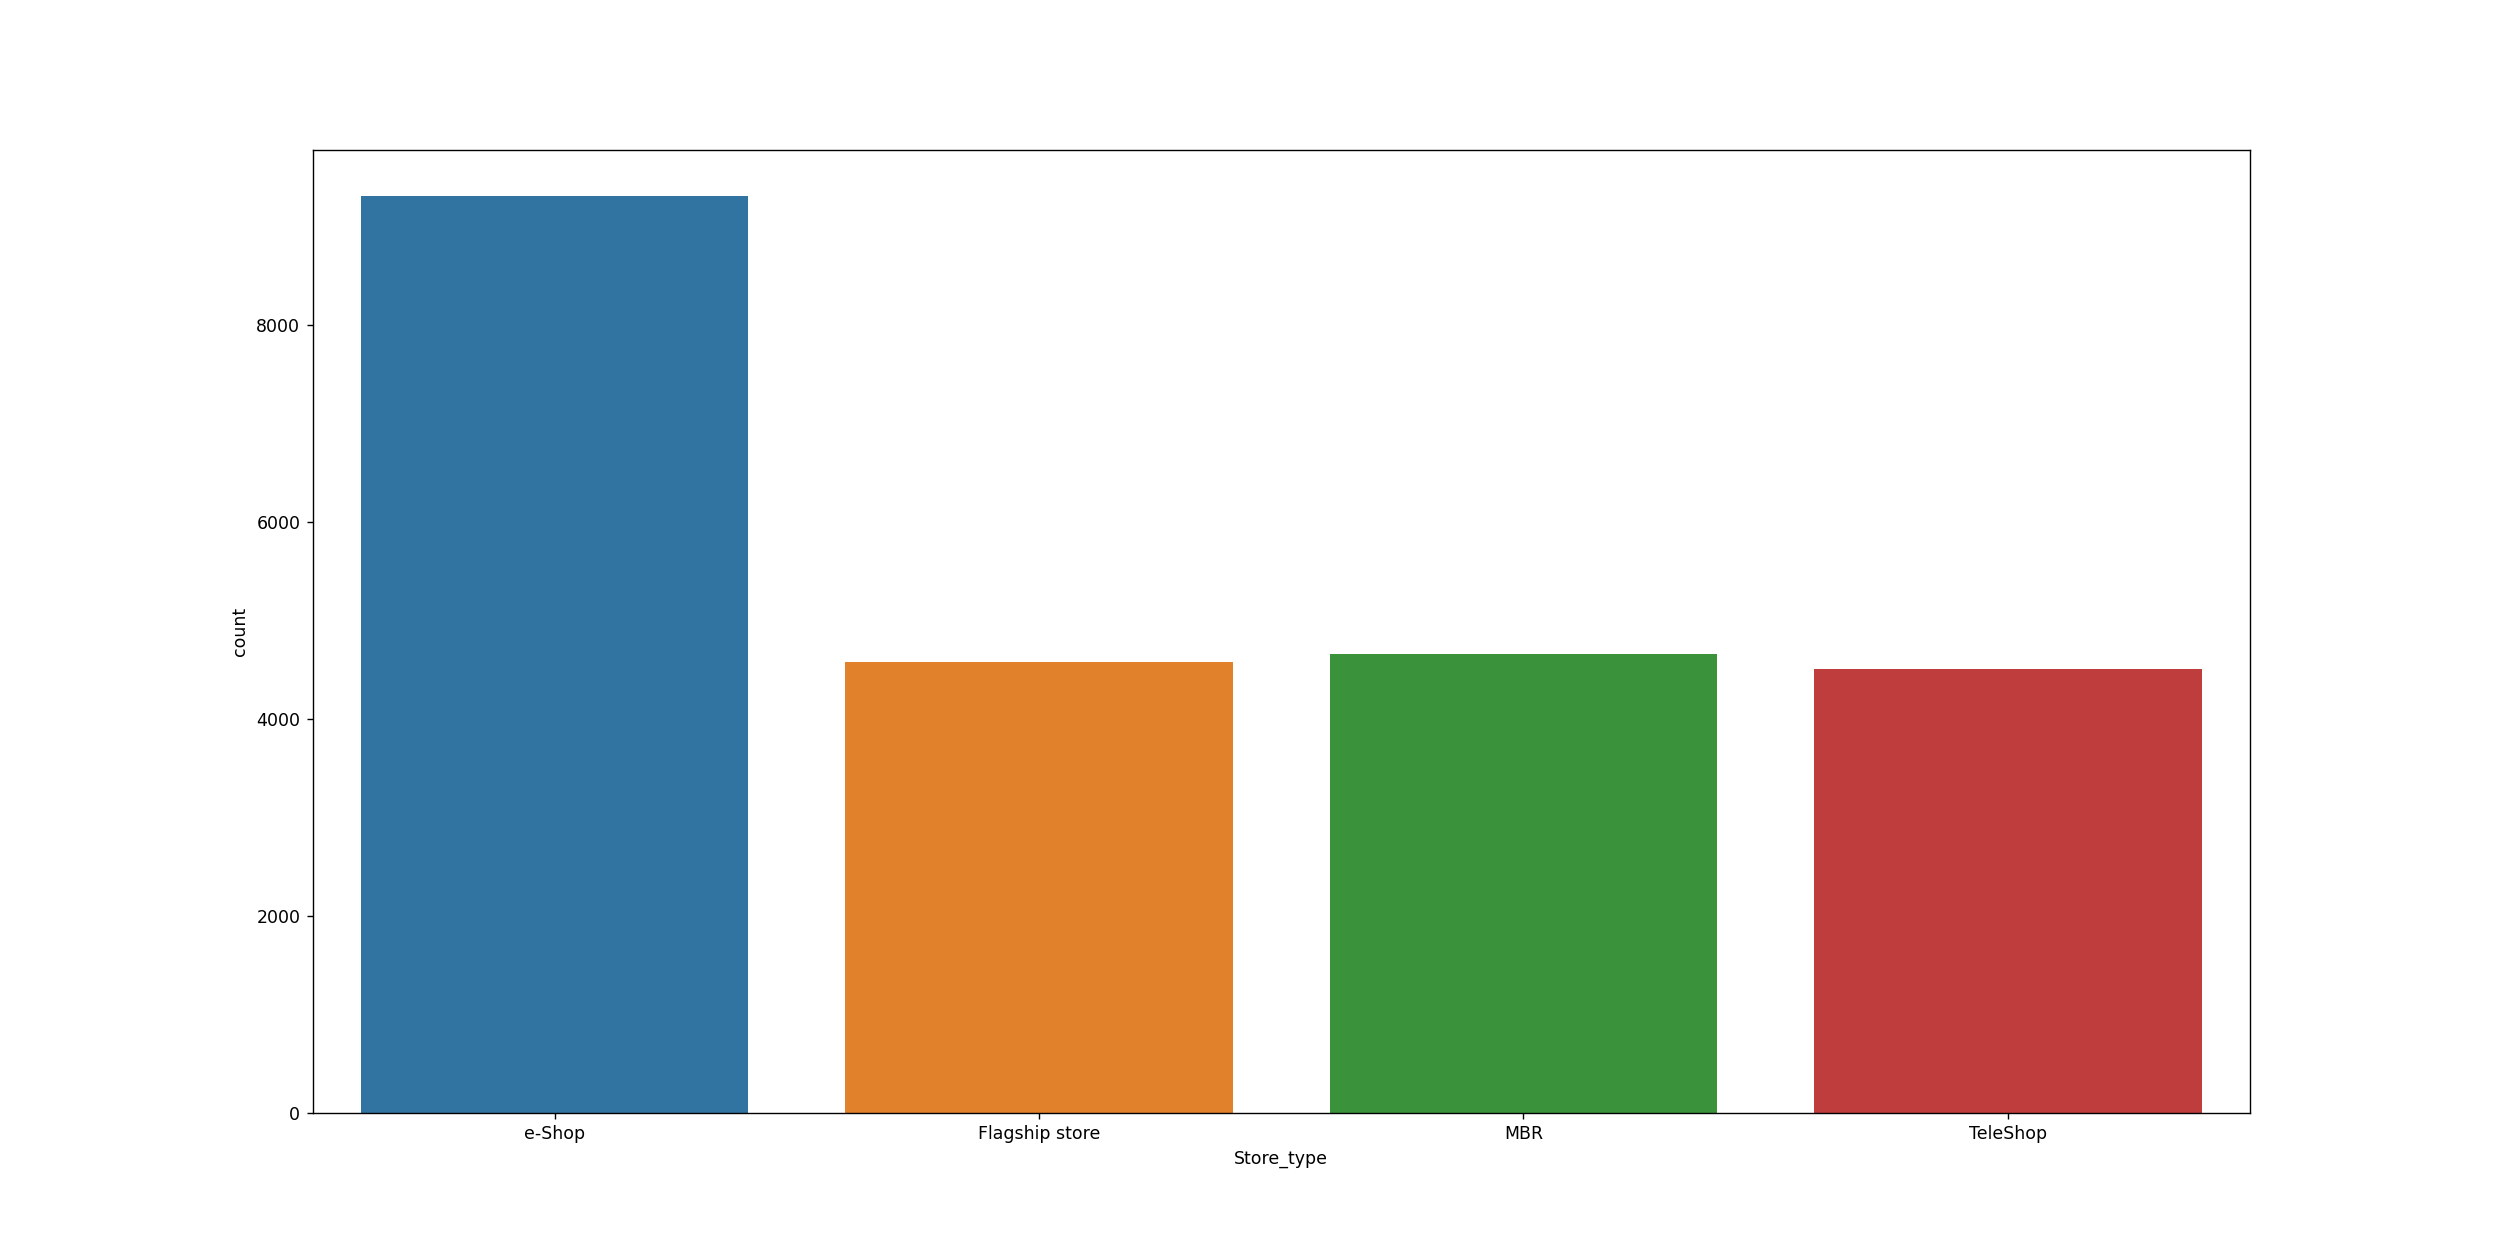

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


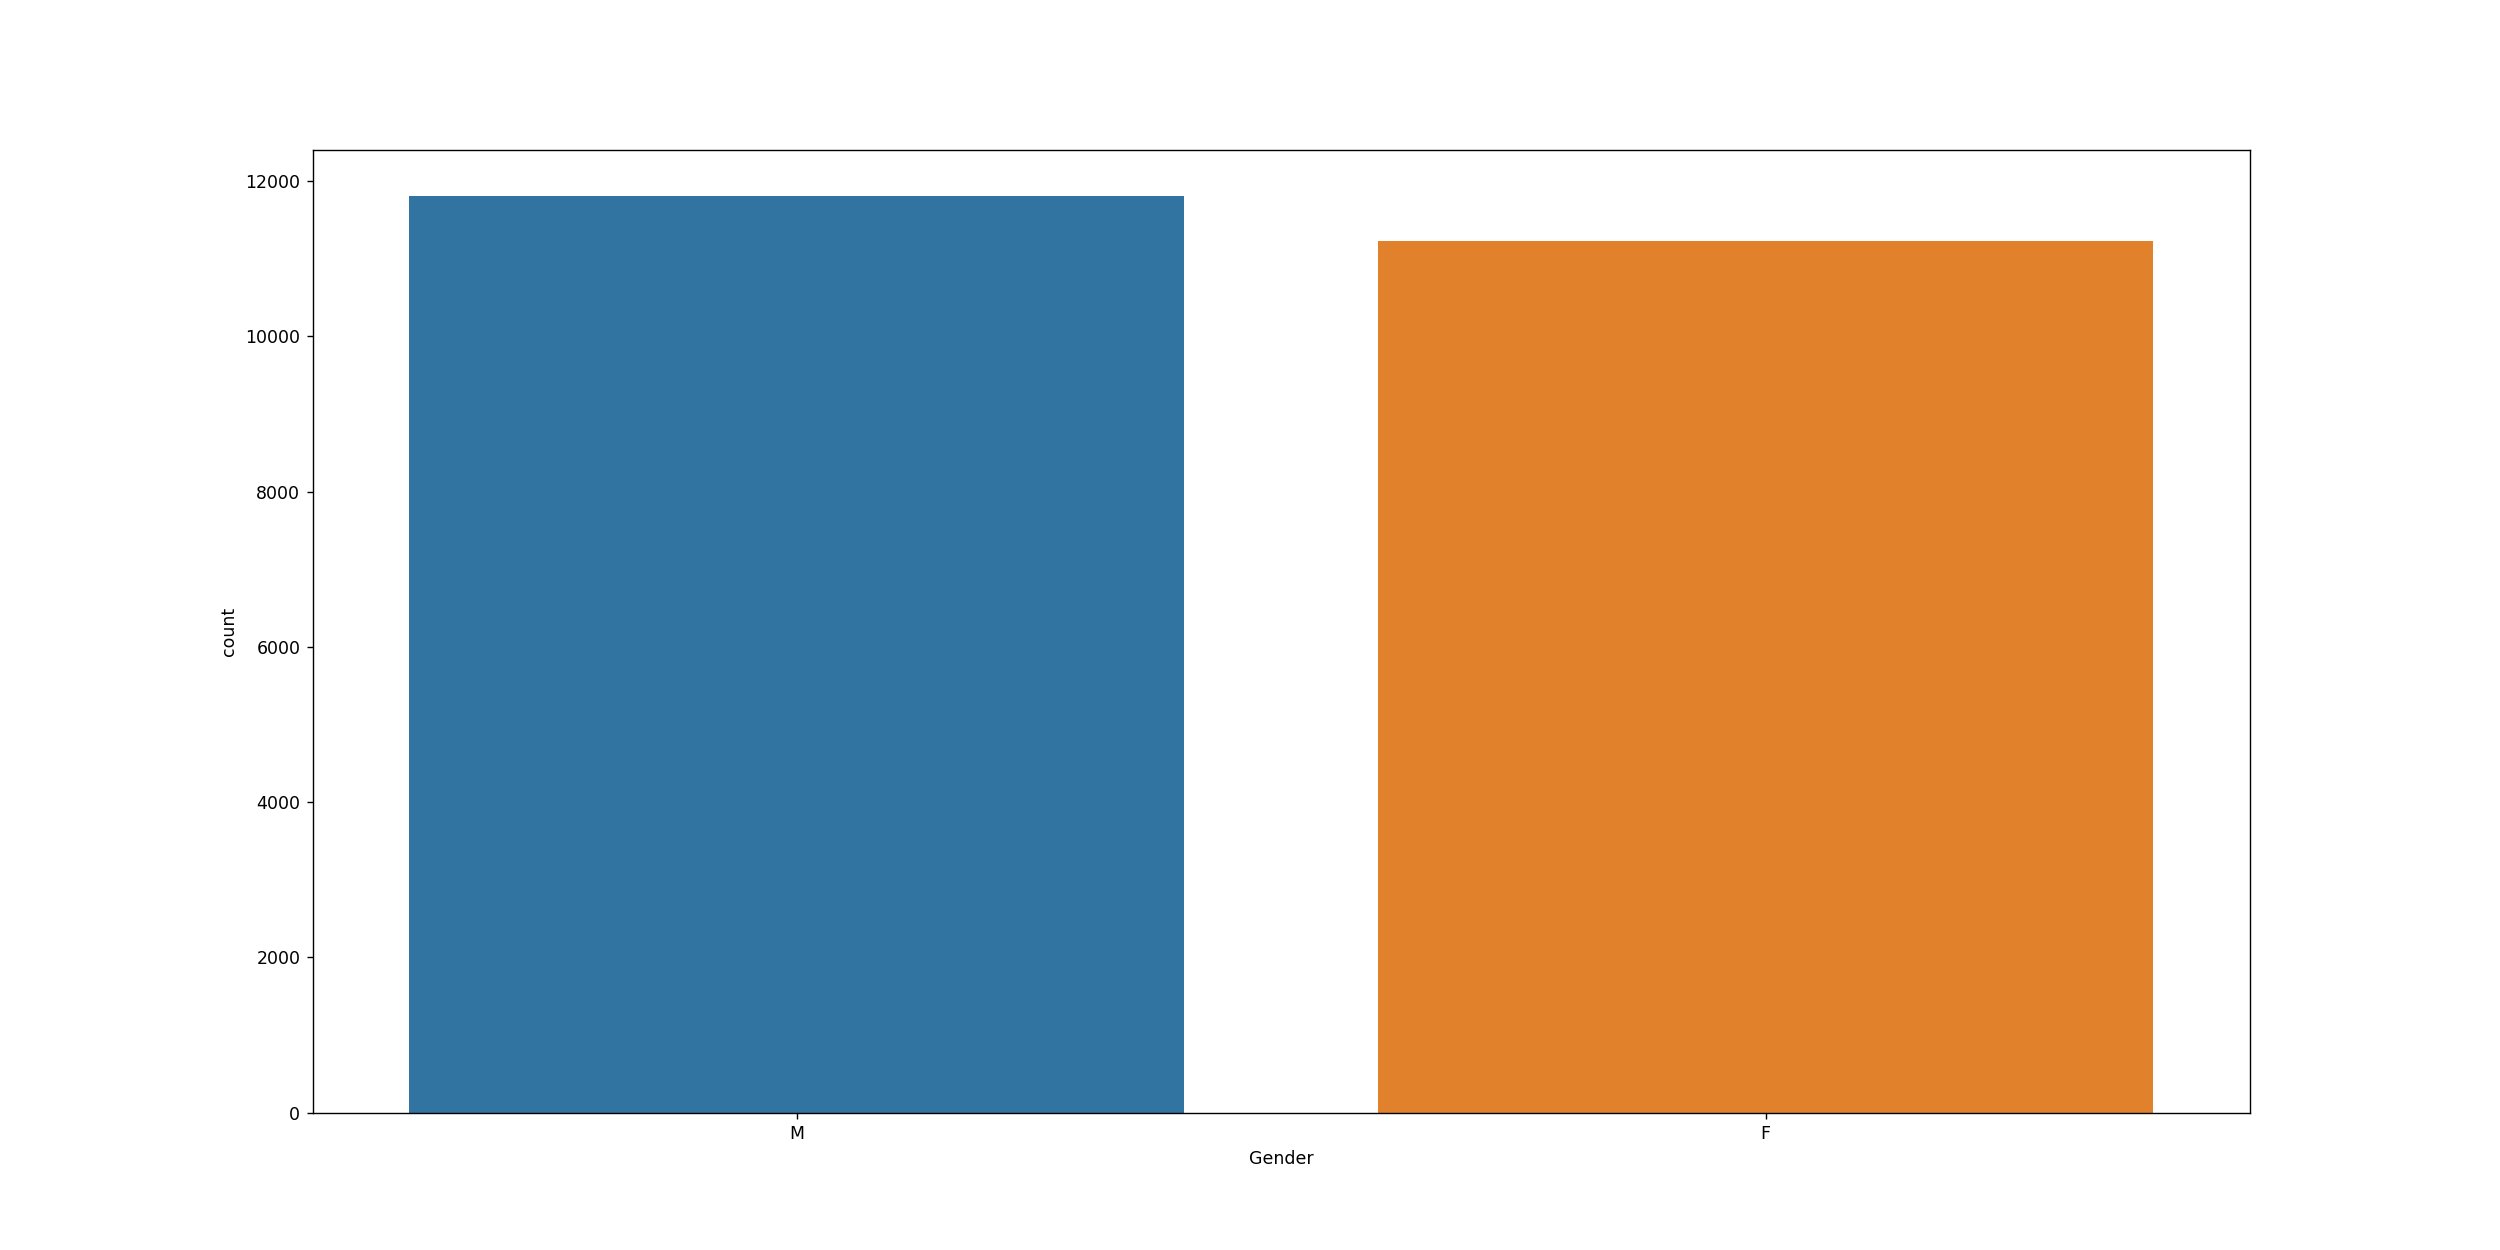

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


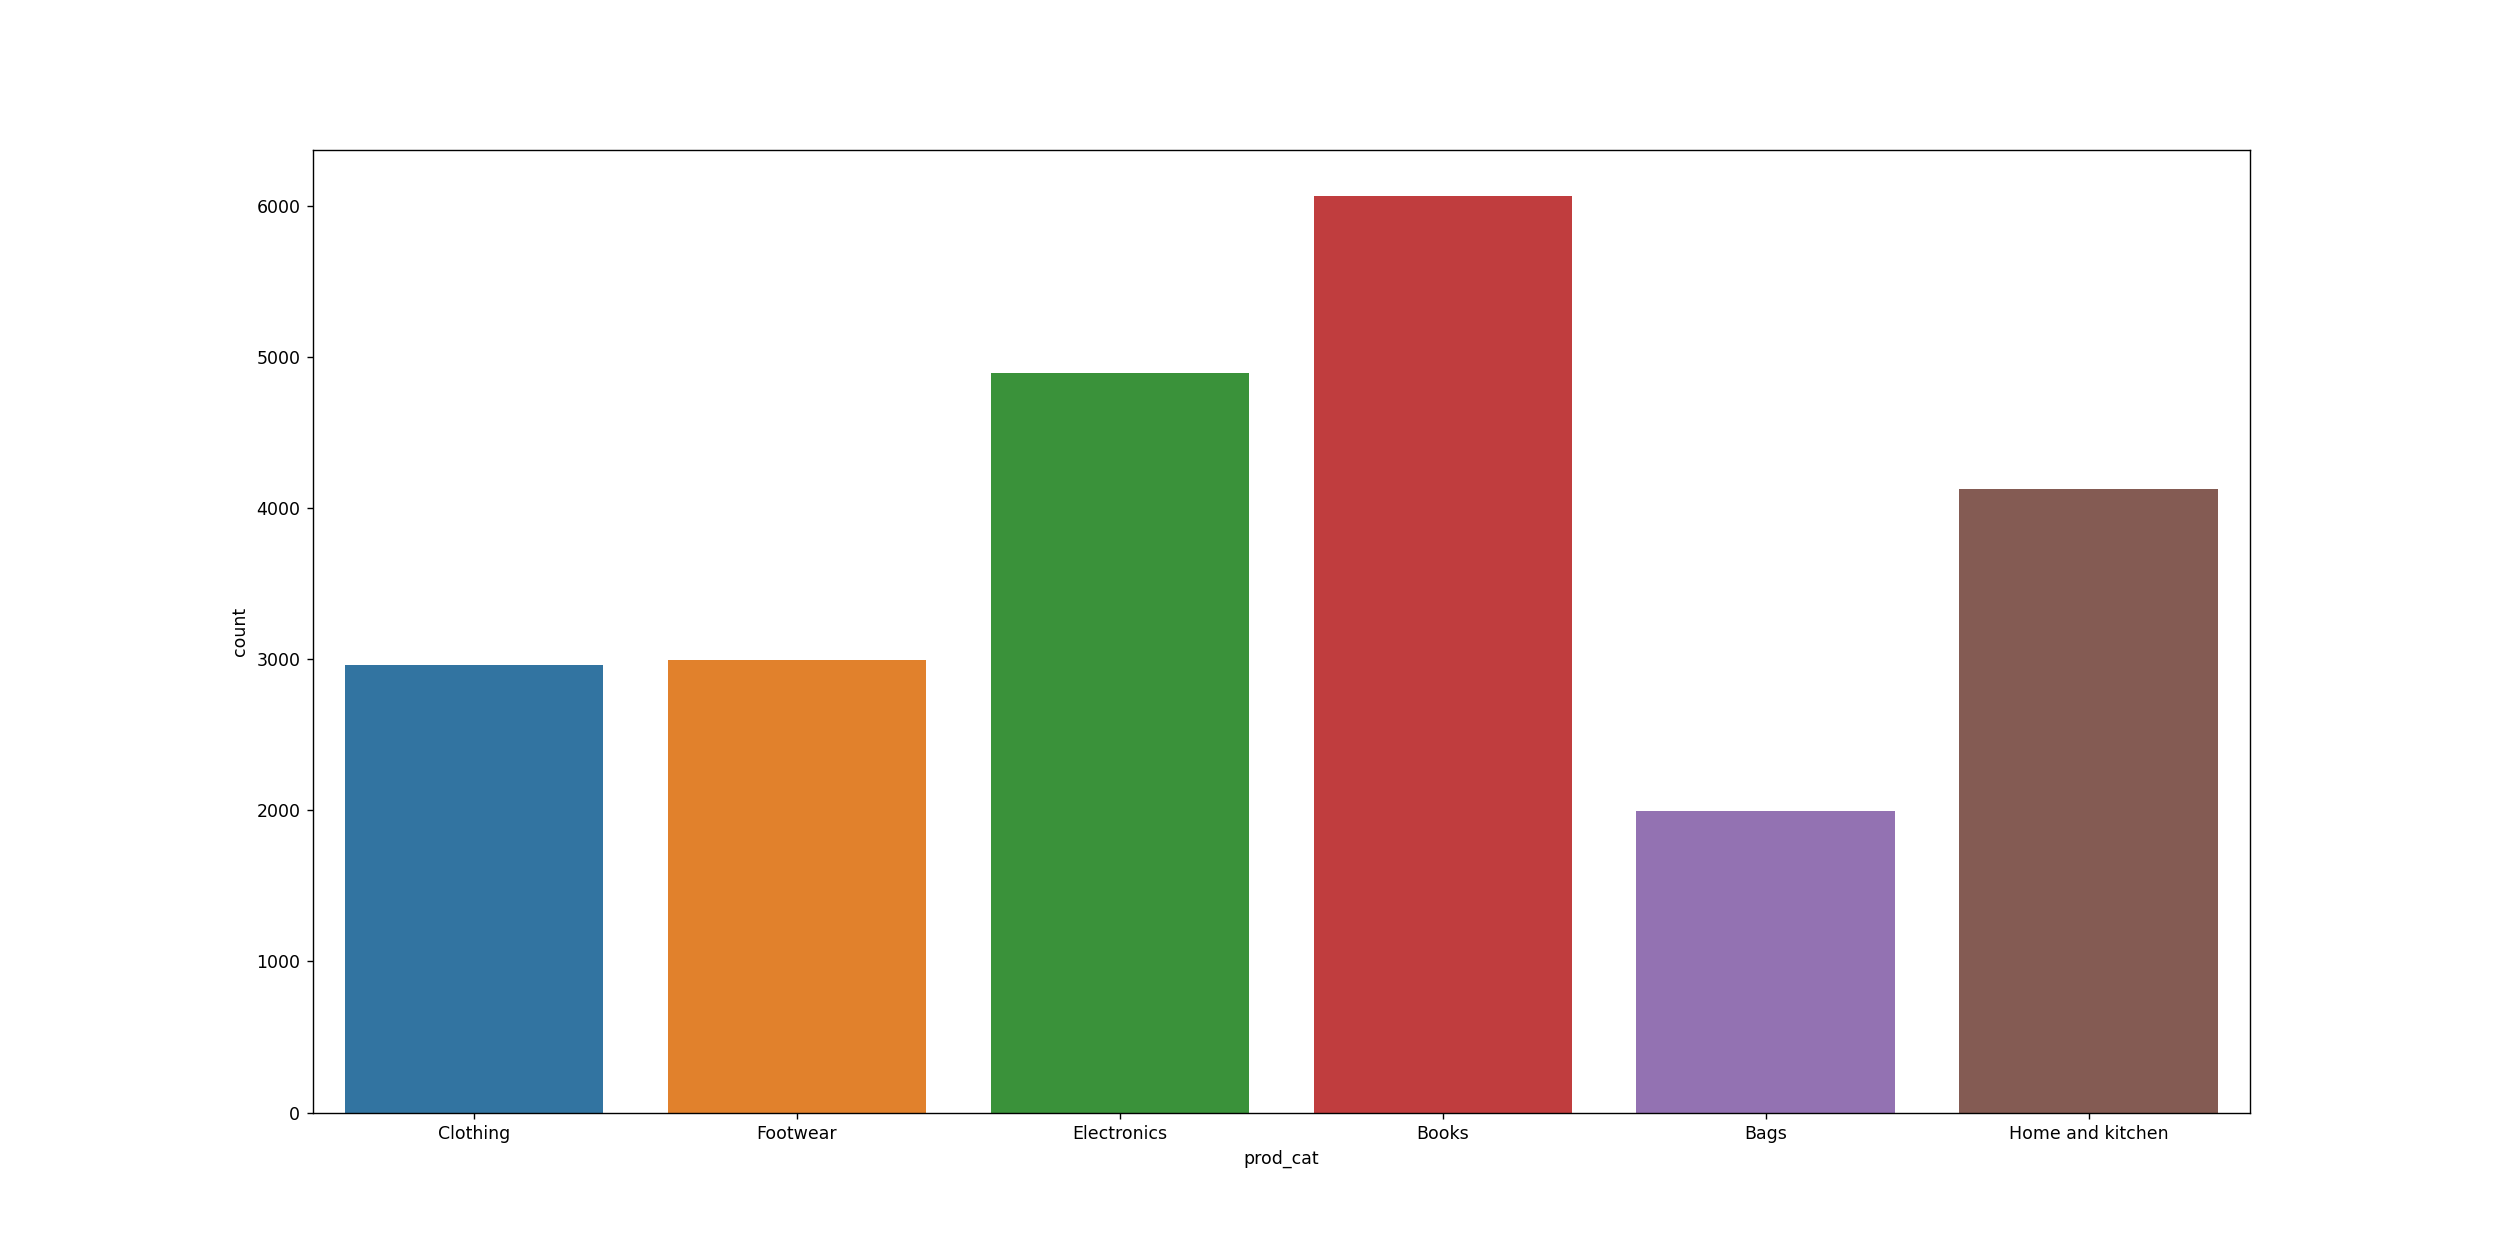

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


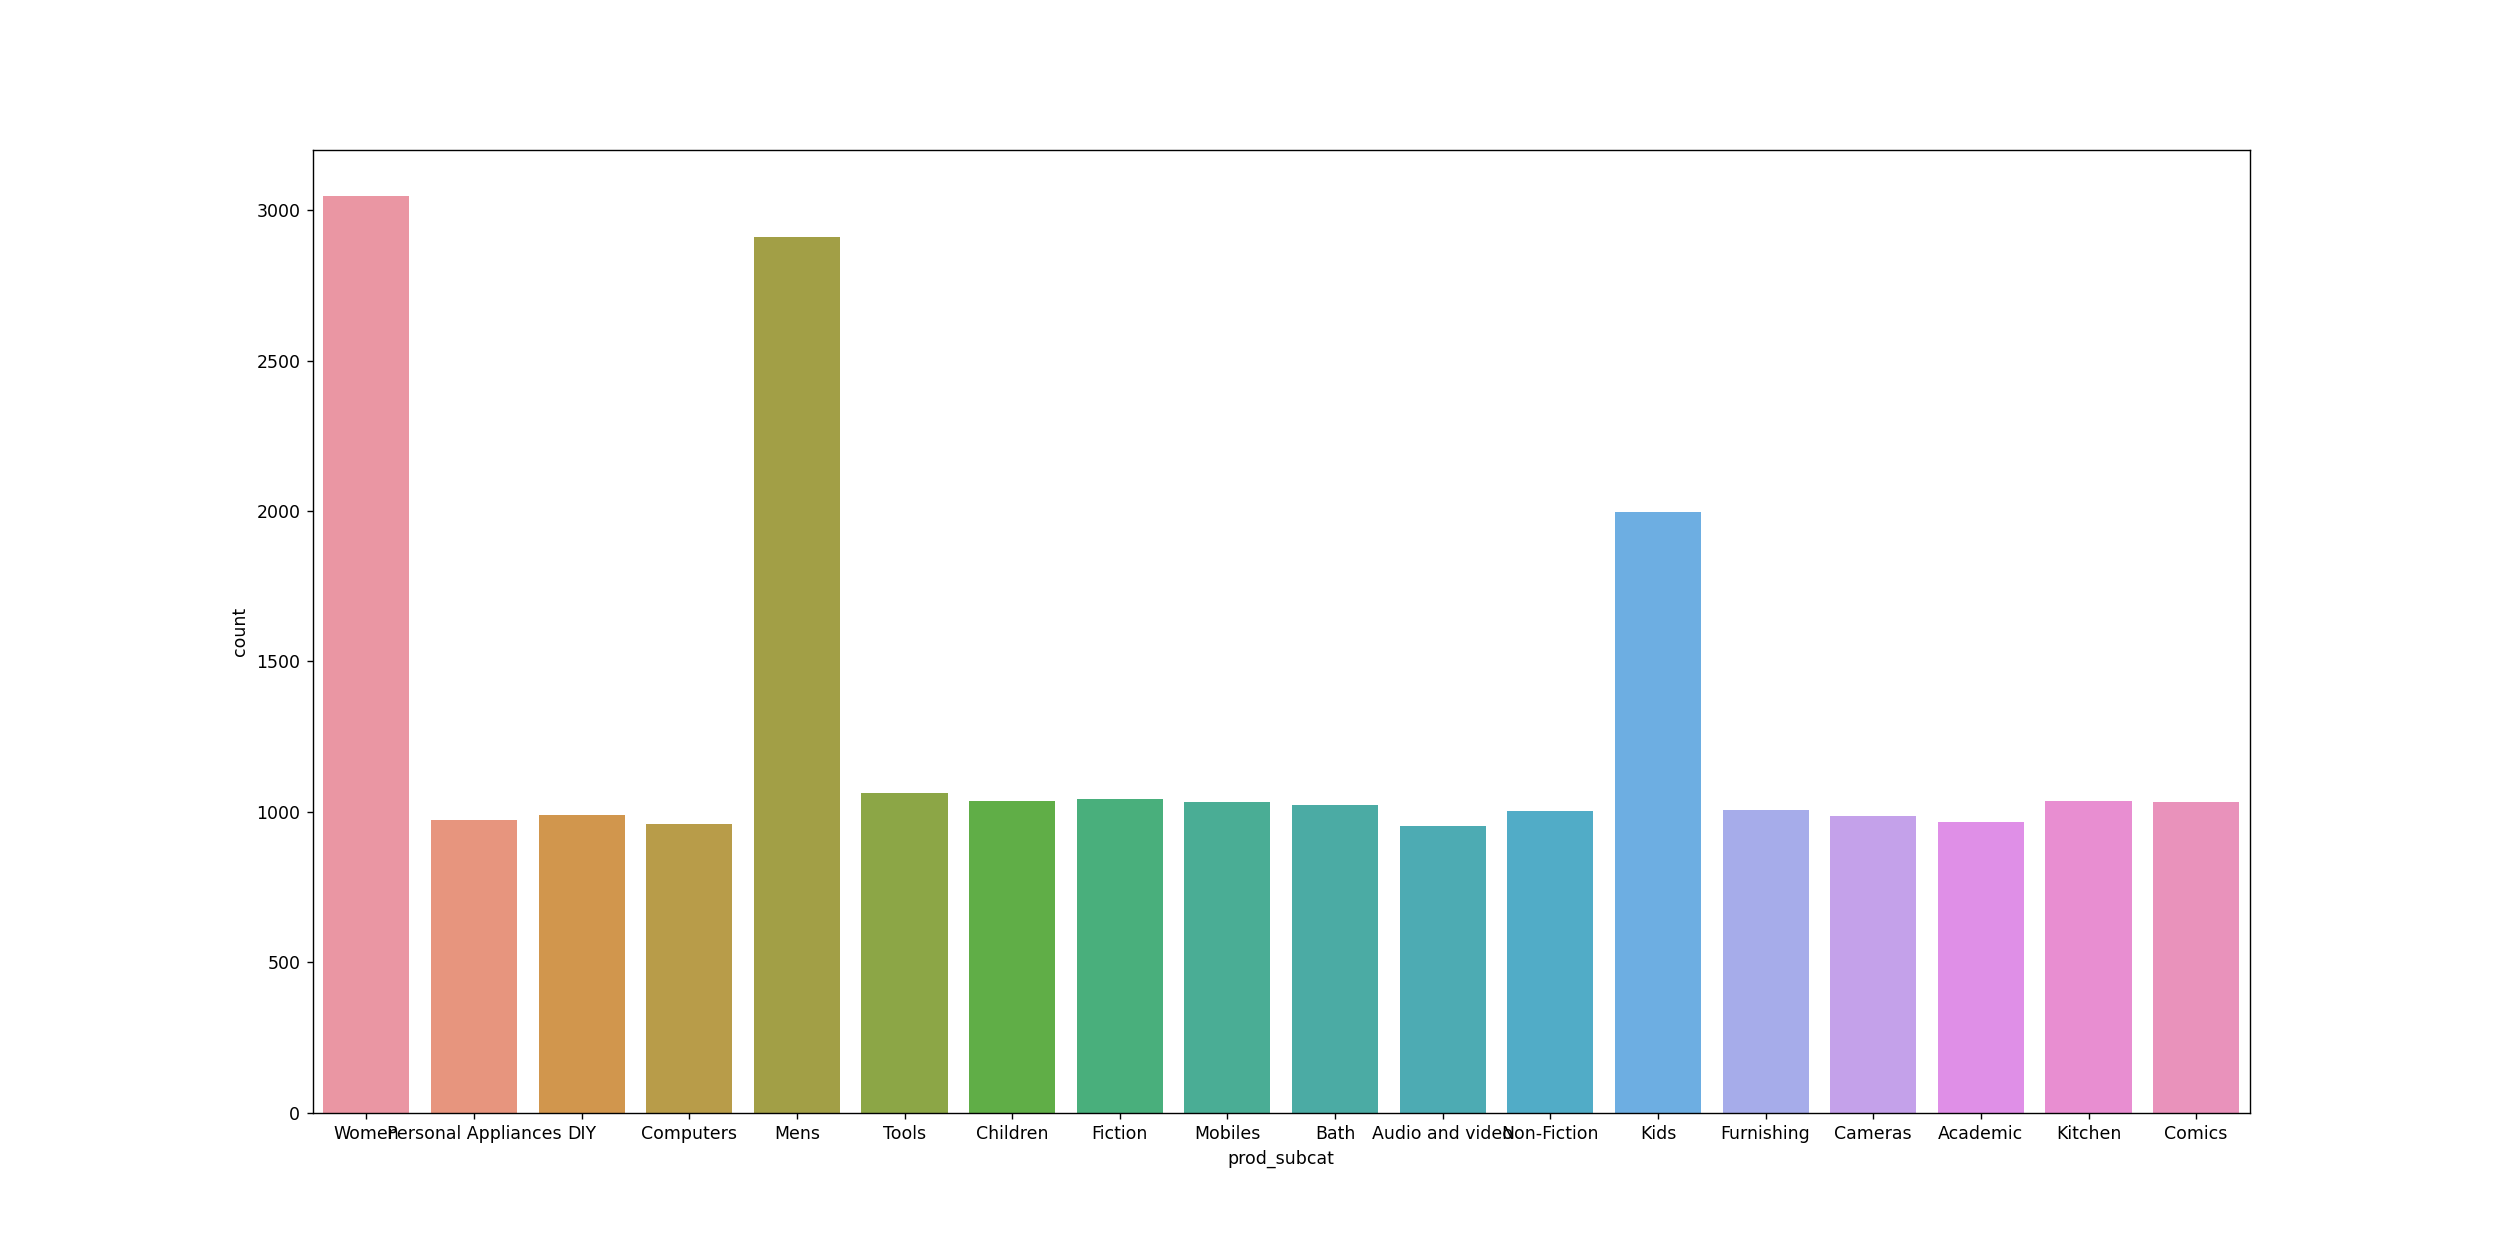

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Store_type     None
Gender         None
prod_cat       None
prod_subcat    None
dtype: object

In [202]:
customer_final.select_dtypes(['object']).apply(lambda x: frequency_tables(x))

<IPython.core.display.Javascript object>


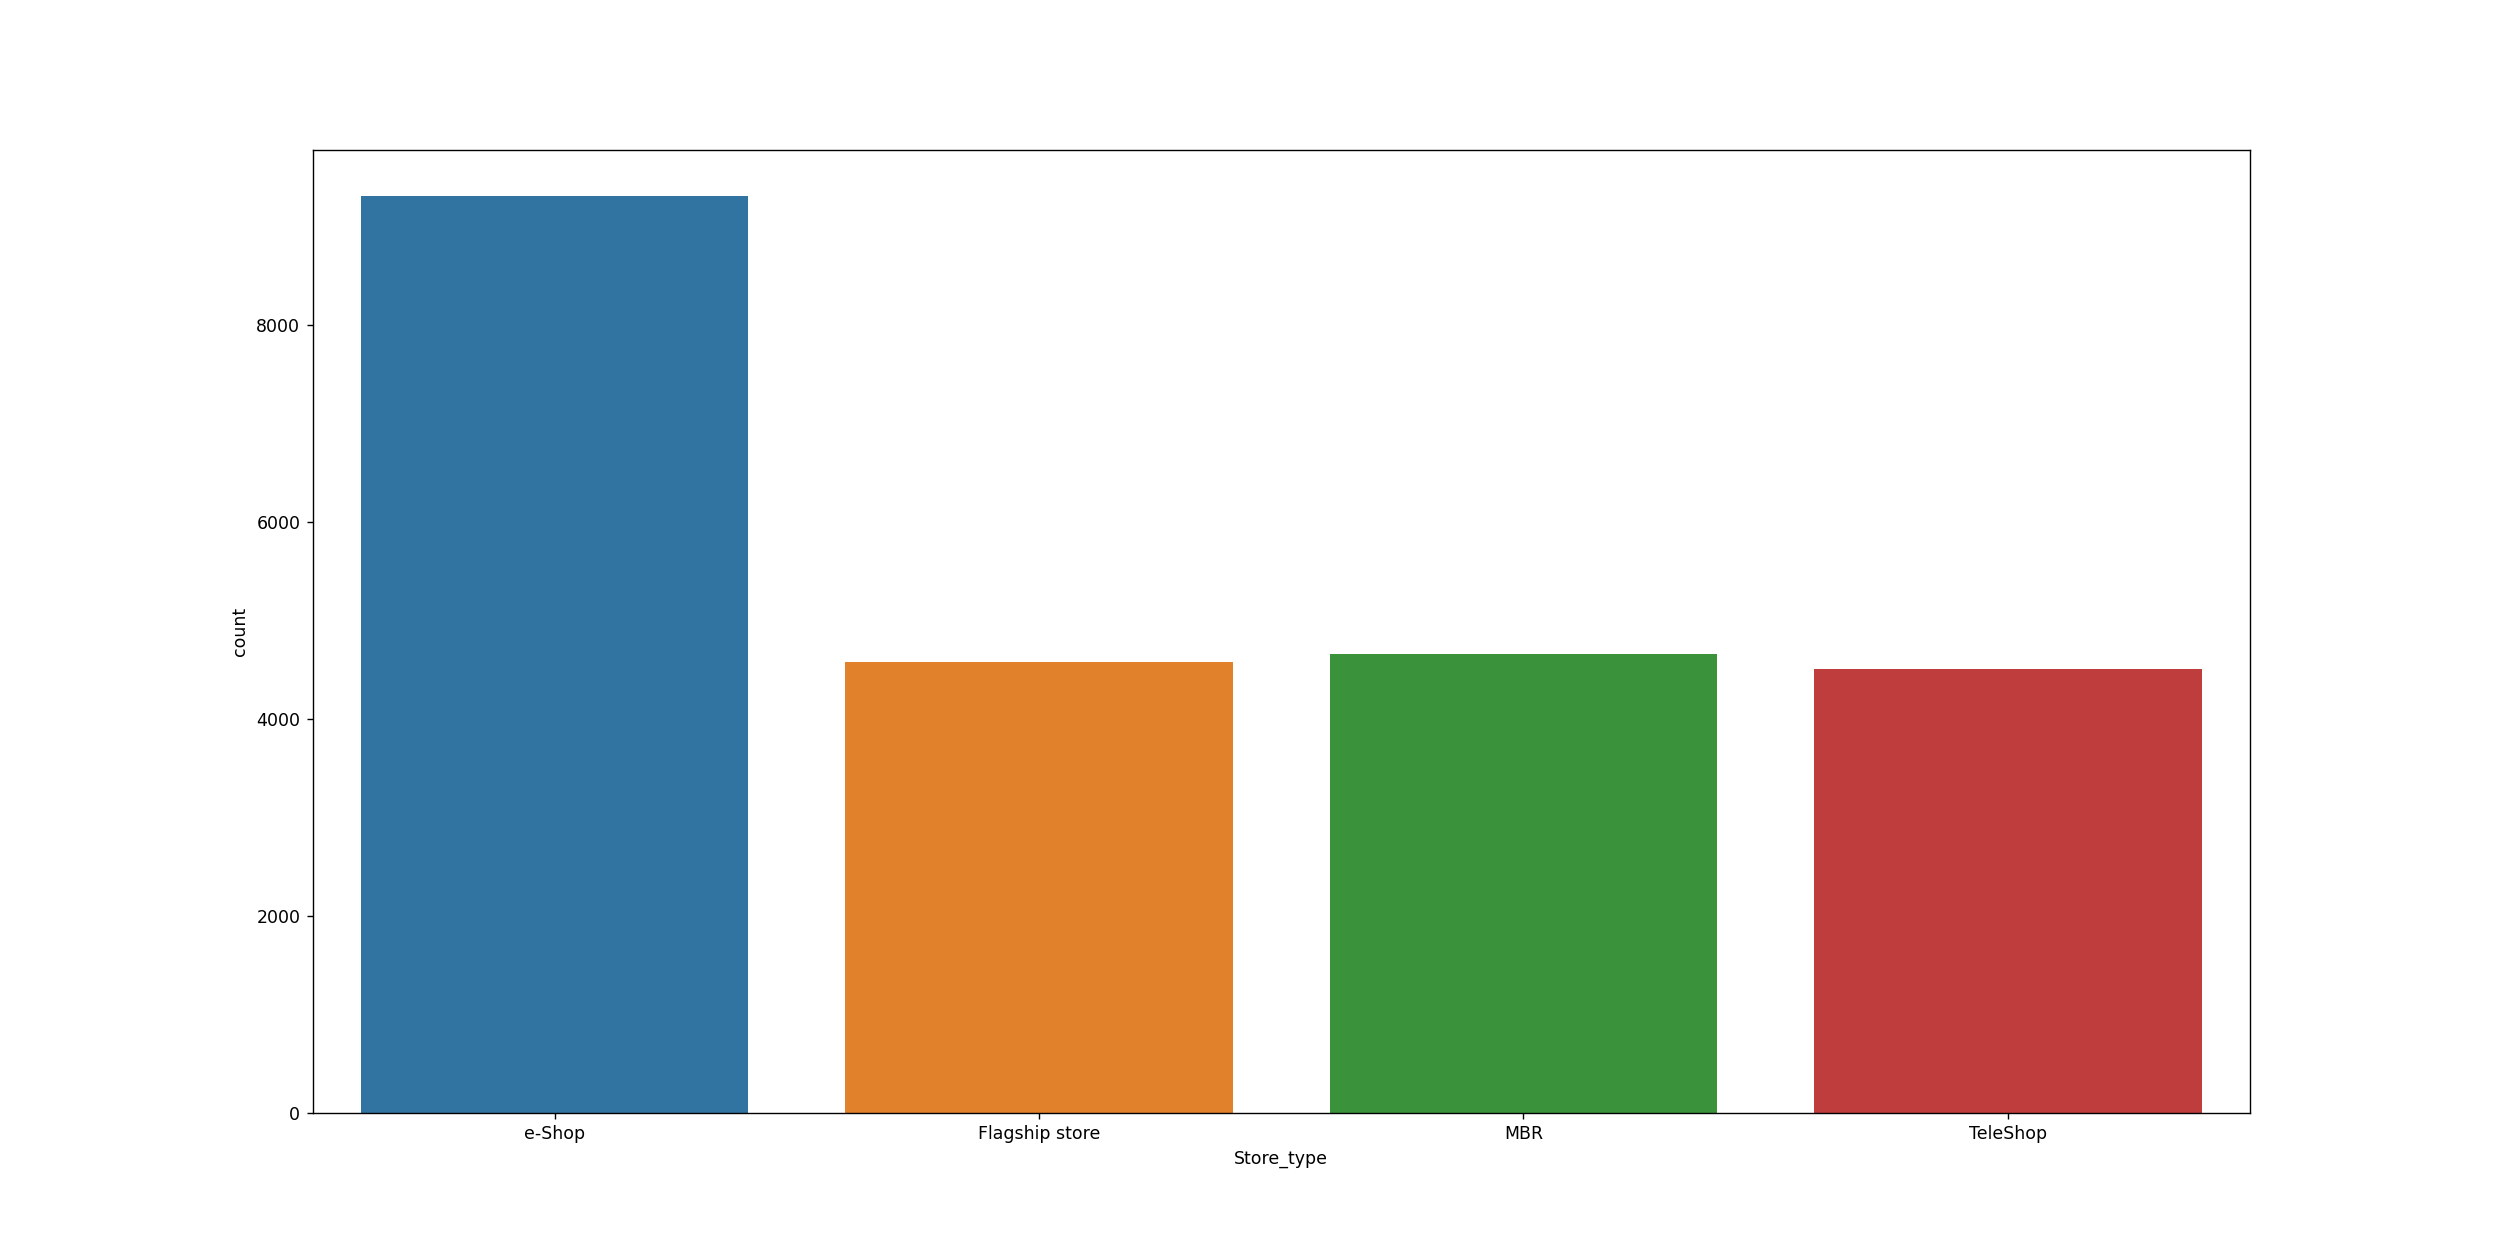

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


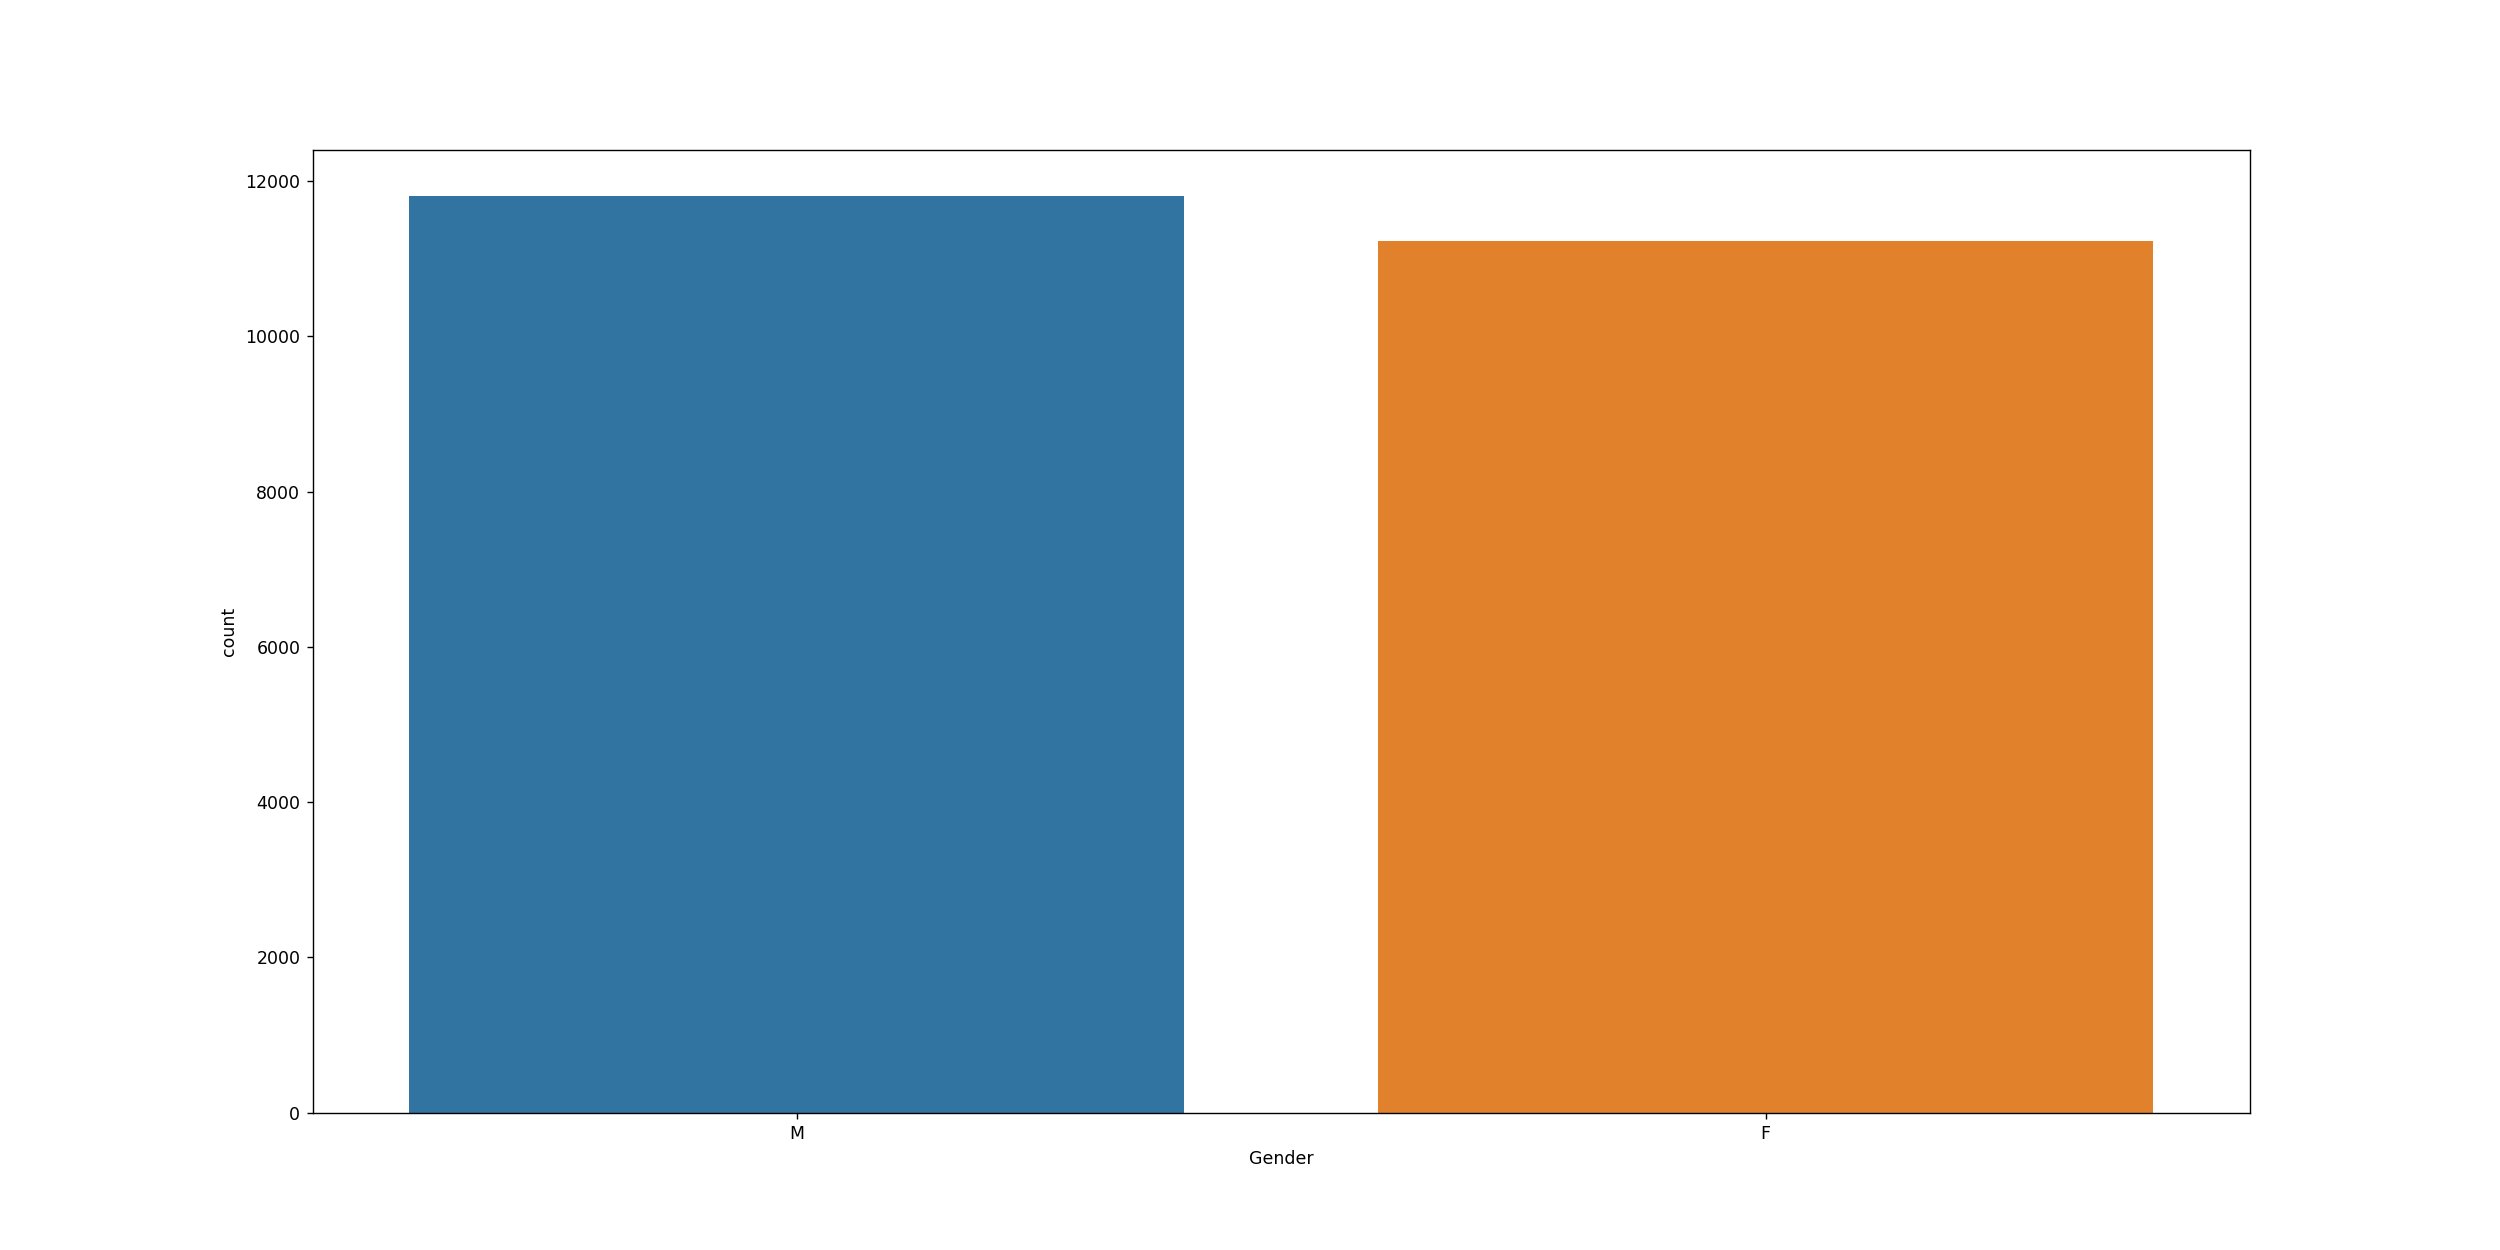

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


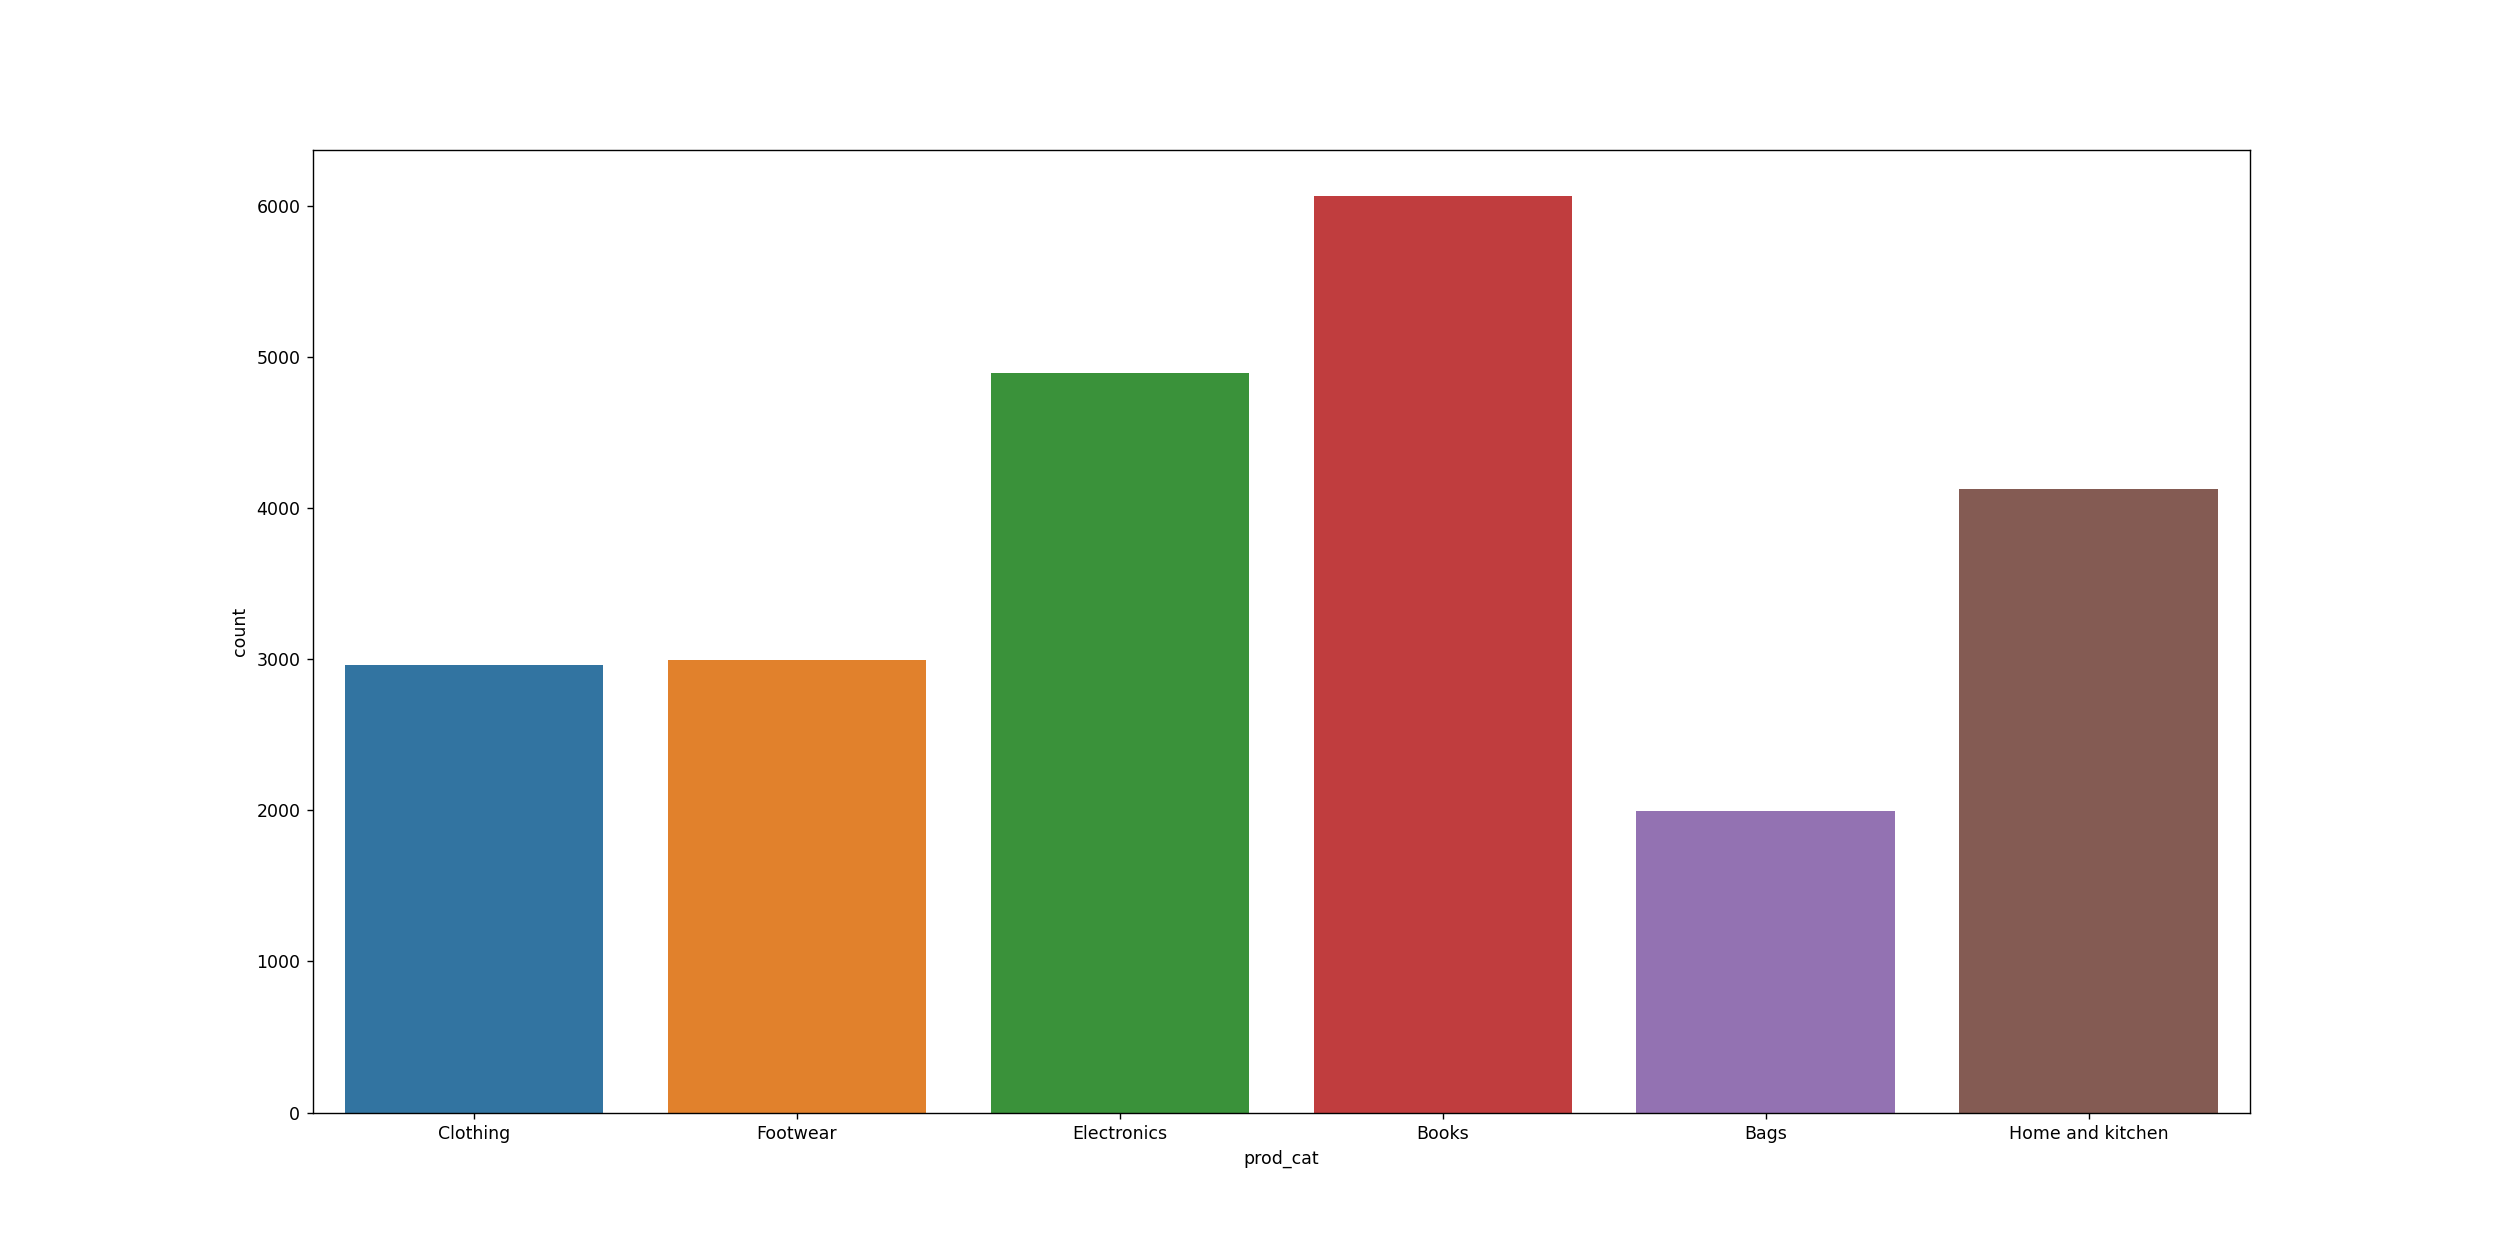

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


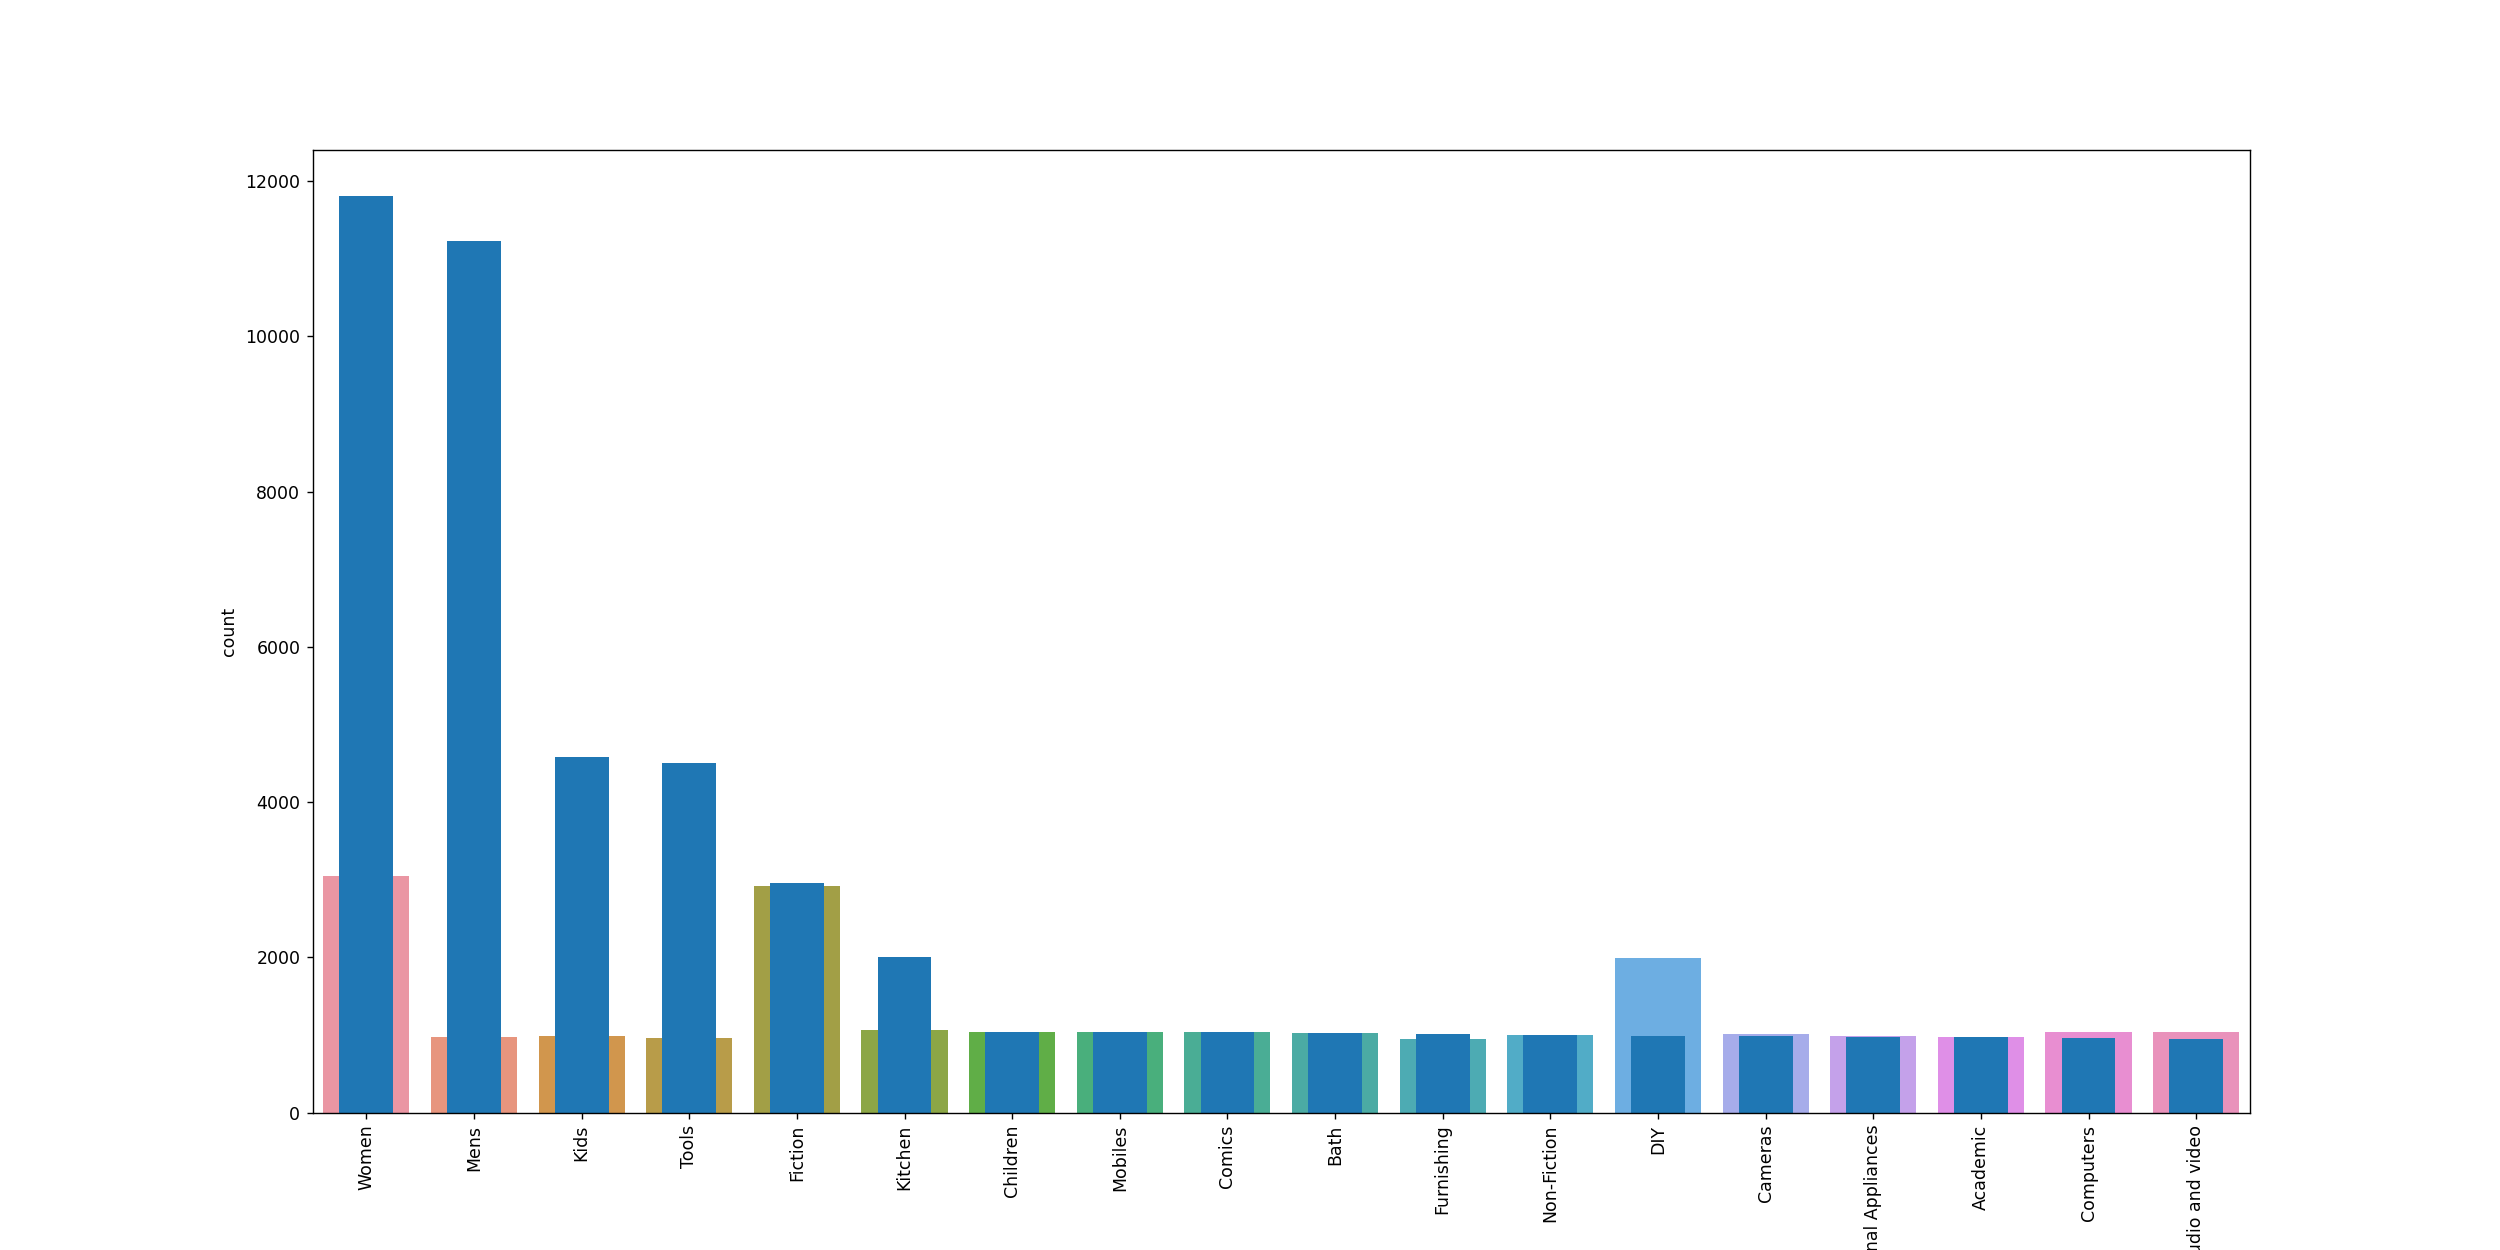

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Store_type     None
Gender         None
prod_cat       None
prod_subcat    None
dtype: object

In [203]:
customer_final.select_dtypes(['object']).apply(lambda x: frequency_tables(x))

In [204]:
cat_data.columns

Index(['Store_type', 'prod_cat', 'prod_subcat', 'Gender'], dtype='object')

In [205]:
cat_data.Store_type.value_counts().plot.bar()
plt.show

<function matplotlib.pyplot.show(block=None)>

In [206]:
cat_data.Gender.value_counts().plot.bar()
plt.show()

In [207]:
cat_data.prod_cat.value_counts().plot.bar()

<AxesSubplot:xlabel='prod_subcat', ylabel='count'>

In [208]:
cat_data.prod_subcat.value_counts().plot.bar()
plt.show()

In [209]:
trans = pd.Series(customer_final.tran_date.apply(lambda x: x.replace("/", "-")))
trans = pd.to_datetime(trans, format="%d-%m-%Y")
trans.sort_values(inplace = True)
first = trans[trans.size-1]
last = trans[0]
last-first

ValueError: value must be an integer, received <class 'str'> for year

In [210]:
Customer_Final[Customer_Final.total_amt < 0].shape[0]

NameError: name 'Customer_Final' is not defined

In [211]:
len(customer_final.total_amt < 0)

23053

In [212]:
Max_Available_Date=customer_final.tran_date.max()
Min_Available_Date=customer_final.tran_date.min()
(Max_Available_Date - Min_Available_Date).days

1130

In [213]:
count_cat = customer_final.groupby(['prod_cat', 'Gender'])['transaction_id'].count().reset_index()
count_cat.rename(columns = {'transaction_id':'count'}, inplace = True)
count_cat

,prod_cat,Gender,count
0,Bags,F,994
1,Bags,M,1004
2,Books,F,2949
3,Books,M,3116
4,Clothing,F,1439
5,Clothing,M,1518
6,Electronics,F,2328
7,Electronics,M,2570
8,Footwear,F,1529
9,Footwear,M,1469


In [214]:
max_tran = count_cat.groupby('prod_cat')['count'].max()
max_gender = count_cat.merge(max_tran, on='count', how='right')
max_gender

,prod_cat,Gender,count
0,Bags,M,1004
1,Books,M,3116
2,Clothing,M,1518
3,Electronics,M,2570
4,Footwear,F,1529
5,Home and kitchen,M,2134


In [215]:
city_count = customer_final.groupby('city_code')['transaction_id'].count().reset_index()
city_count

,city_code,transaction_id
0,1.0,2258
1,2.0,2270
2,3.0,2411
3,4.0,2422
4,5.0,2360
5,6.0,2127
6,7.0,2356
7,8.0,2330
8,9.0,2178
9,10.0,2333


In [216]:
city_count[city_count.transaction_id == city_count.transaction_id.max()]

,city_code,transaction_id
3,4.0,2422


In [217]:
quantity = customer_final.groupby('Store_type')['Qty'].sum().reset_index()
quantity

,Store_type,Qty
0,Flagship store,11133
1,MBR,11194
2,TeleShop,10984
3,e-Shop,22763


In [218]:
quantity[quantity.Qty == quantity.Qty .max()]

,Store_type,Qty
3,e-Shop,22763


In [219]:
cat_val = customer_final.groupby(['Store_type', 'prod_cat'])['total_amt'].sum().reset_index()
flagship = cat_val[cat_val.Store_type == 'Flagship store']    
EandC = flagship[(flagship.prod_cat == 'Electronics') | (flagship.prod_cat == 'Clothing')]
EandC

,Store_type,prod_cat,total_amt
2,Flagship store,Clothing,1194423.23
3,Flagship store,Electronics,2215136.04


In [220]:
sale_gender = customer_final.groupby(['prod_cat', 'Gender'])['total_amt'].sum().reset_index()
sale_gender

,prod_cat,Gender,total_amt
0,Bags,F,2077985.650
1,Bags,M,2046722.990
2,Books,F,6164692.235
3,Books,M,6645972.775
4,Clothing,F,3026750.805
5,Clothing,M,3224079.495
6,Electronics,F,5019354.210
7,Electronics,M,5703109.425
8,Footwear,F,3202552.990
9,Footwear,M,3014672.050


In [221]:
sale_gender[(sale_gender.prod_cat=="Electronics") & (sale_gender.Gender=="M")]

,prod_cat,Gender,total_amt
7,Electronics,M,5703109.425


In [222]:
postive_trans = customer_final[customer_final.total_amt>0].reset_index(drop=True)
postive_trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
1,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-06-08,M,3.0,Clothing,1,Women
2,92814475704,267750,2013-08-07,1,1,4,284,119.280,1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,1,Women
3,4737317330,269345,2011-07-29,1,1,5,1141,599.025,6304.025,MBR,269345,1970-06-26,F,10.0,Clothing,1,Women
4,44425889101,274987,2012-03-18,1,1,4,897,376.740,3964.740,Flagship store,274987,1983-10-08,M,2.0,Clothing,1,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20871,7173864364,271157,2011-04-09,4,4,5,788,413.700,4353.700,Flagship store,271157,1973-10-15,F,6.0,Bags,4,Women
20872,5618131425,272010,2011-03-03,4,4,2,1150,241.500,2541.500,MBR,272010,1972-12-22,F,5.0,Bags,4,Women
20873,18727956164,267161,2011-02-23,4,4,5,668,350.700,3690.700,e-Shop,267161,1981-05-08,M,9.0,Bags,4,Women
20874,60416814232,273281,2011-02-18,4,4,4,202,84.840,892.840,Flagship store,273281,1988-12-14,F,9.0,Bags,4,Women


In [223]:
transaction_count = postive_trans.groupby('customer_Id')['transaction_id'].count().reset_index()
transaction_count

,customer_Id,transaction_id
0,266783,4
1,266784,3
2,266785,7
3,266788,4
4,266794,11
...,...,...
5501,275257,4
5502,275261,3
5503,275262,2
5504,275264,2


In [224]:
transaction_count[transaction_count.transaction_id>10]

,customer_Id,transaction_id
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11


In [225]:
customer_final.DOB = pd.to_datetime(customer_final.DOB, format = "%d-%m-%Y")
DOB = customer_final.DOB
DOB


0       1981-09-26
1       1981-09-26
2       1981-06-08
3       1986-10-13
4       1986-10-13
           ...    
23048   1973-10-15
23049   1972-12-22
23050   1981-05-08
23051   1988-12-14
23052   1984-01-21
Name: DOB, Length: 23053, dtype: datetime64[ns]

In [226]:
customer_final['age'] = DOB.apply(lambda x: pd.to_datetime('today').year-x.year)

age_barred = customer_final[(customer_final.age>=25) & (customer_final.age<=35)].reset_index(drop=True)
age_barred.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,age
0,90501340928,271817,2012-02-19,1,1,1,1122,117.810,1239.810,TeleShop,271817,1989-12-24,M,8.0,Clothing,1,Women,34
1,90954125896,269387,2013-03-18,1,1,4,839,352.380,3708.380,MBR,269387,1990-02-03,F,10.0,Clothing,1,Women,33
2,11999444239,268052,2012-06-18,1,1,2,1324,278.040,2926.040,Flagship store,268052,1988-12-18,M,7.0,Clothing,1,Women,35
3,57134739558,270625,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,270625,1992-02-03,M,6.0,Clothing,1,Women,31
4,42584381402,270625,2012-06-22,1,1,5,1371,719.775,7574.775,TeleShop,270625,1992-02-03,M,6.0,Clothing,1,Women,31


In [227]:
age_catg = age_barred.groupby('prod_cat')['total_amt'].sum().reset_index()
age_catg

,prod_cat,total_amt
0,Bags,873679.300
1,Books,2667784.925
2,Clothing,1443346.580
3,Electronics,2272147.410
4,Footwear,1433147.430
5,Home and kitchen,1864549.375


In [228]:
age_catg[(age_catg.prod_cat=='Electronics') | (age_catg.prod_cat=='Books')]

,prod_cat,total_amt
1,Books,2667784.925
3,Electronics,2272147.410


In [229]:

age_barred.tran_date = age_barred.tran_date.apply(lambda x: x.replace('/', '-'))


age_barred.tran_date = pd.to_datetime(age_barred.tran_date, format='%d-%m-%Y')

ValueError: value must be an integer, received <class 'str'> for year

In [230]:
date_barred = age_barred[(age_barred.tran_date > pd.to_datetime('01-01-2014', format='%d-%m-%Y')) & (age_barred.tran_date<pd.to_datetime('01-03-2014', format='%d-%m-%Y'))].reset_index(drop=True)
date_barred

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,age
0,57134739558,270625,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,270625,1992-02-03,M,6.0,Clothing,1,Women,31
1,64939234724,270240,2014-01-29,1,1,4,644,270.480,2846.480,e-Shop,270240,1988-12-07,M,1.0,Clothing,1,Women,35
2,65582112405,267243,2014-02-08,1,1,-3,-1259,396.585,-4173.585,e-Shop,267243,1990-03-19,F,6.0,Clothing,1,Women,33
3,65582112405,267243,2014-01-29,1,1,3,1259,396.585,4173.585,e-Shop,267243,1990-03-19,F,6.0,Clothing,1,Women,33
4,51473331806,267794,2014-02-05,1,1,3,292,91.980,967.980,TeleShop,267794,1990-02-07,F,1.0,Clothing,1,Women,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,69724469724,271352,2014-01-14,4,4,1,861,90.405,951.405,MBR,271352,1992-07-18,M,8.0,Bags,4,Women,31
224,70860726874,271749,2014-01-07,4,4,1,1056,110.880,1166.880,MBR,271749,1992-08-19,F,6.0,Bags,4,Women,31
225,29498204760,271189,2014-01-05,4,4,3,1365,429.975,4524.975,e-Shop,271189,1990-08-13,M,9.0,Bags,4,Women,33
226,48216532679,272975,2014-01-04,4,4,4,429,180.180,1896.180,Flagship store,272975,1988-05-15,F,5.0,Bags,4,Women,35


In [231]:
date_barred.total_amt.sum()

529311.575